In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from team_logos import get_partial_pass_rates, get_median_feature, getImage, graph_feature_rate
from PIL import Image

In [2]:
ngs_rush_21 = nfl.import_ngs_data(stat_type='rushing', years=[2021])

Zero-week seems to be season-agged; drop it?

In [3]:
root_dir = os.getcwd()
train_data=pd.read_csv(os.path.join(root_dir, "data/train_data.csv"))

In [4]:
pr_cy = get_partial_pass_rates(2022, 7)
med_feat = get_median_feature(train_data,'off_xpass')

In [5]:
pr_cy.head(3)

,team_abbr,rush_attempts,attempts,pass_ratio
0,ARI,65,281,0.81
1,ATL,139,123,0.47
2,BAL,61,197,0.76


In [6]:
med_feat.head(3)

,possessionTeam,off_xpass
0,ARI,0.644823
1,ATL,0.513726
2,BAL,0.598794


In [7]:
pr_cy = get_partial_pass_rates(2022, 7)
med_feat = get_median_feature(train_data,'off_xpass')
pre_logo_df = pr_cy.merge(med_feat,left_on='team_abbr',right_on='possessionTeam',how='left')

todo: codify week,  season passed in here, call other functions w/it

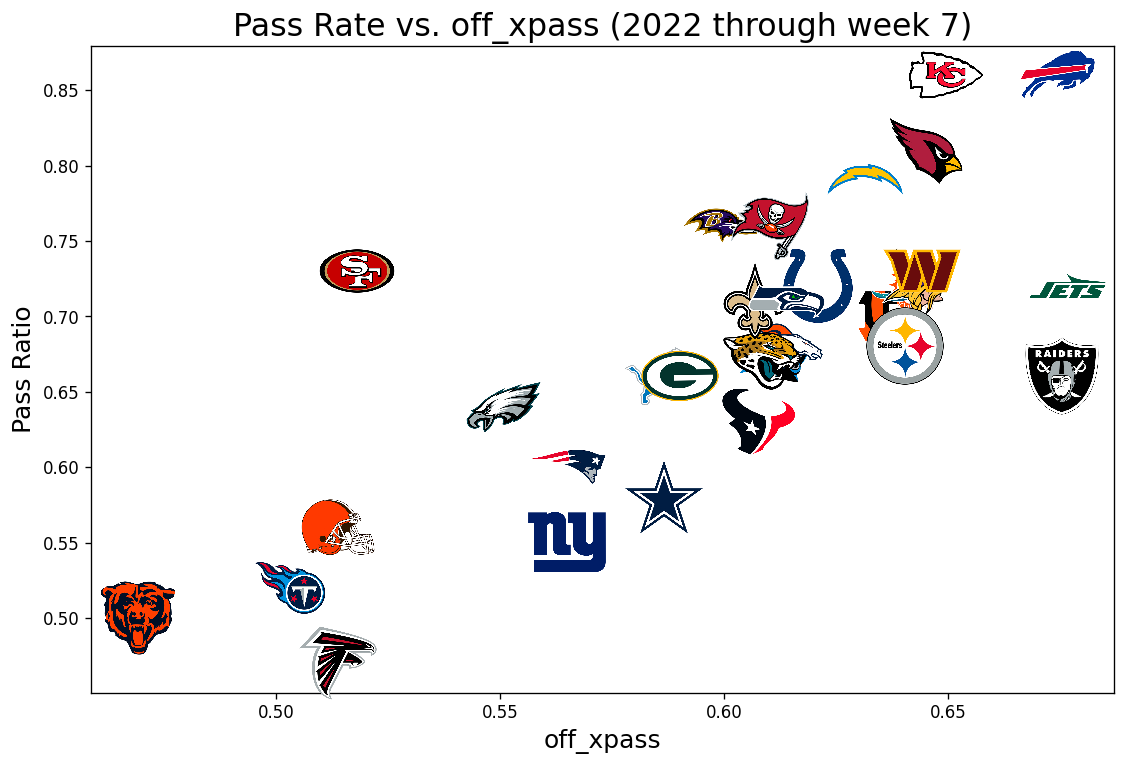

In [8]:
graph_feature_rate(2022,7,'off_xpass',train_data)

now xpass_situational:

In [9]:
train_data.rename(columns={'xpass_situational':'Situational xPass'},inplace=True)

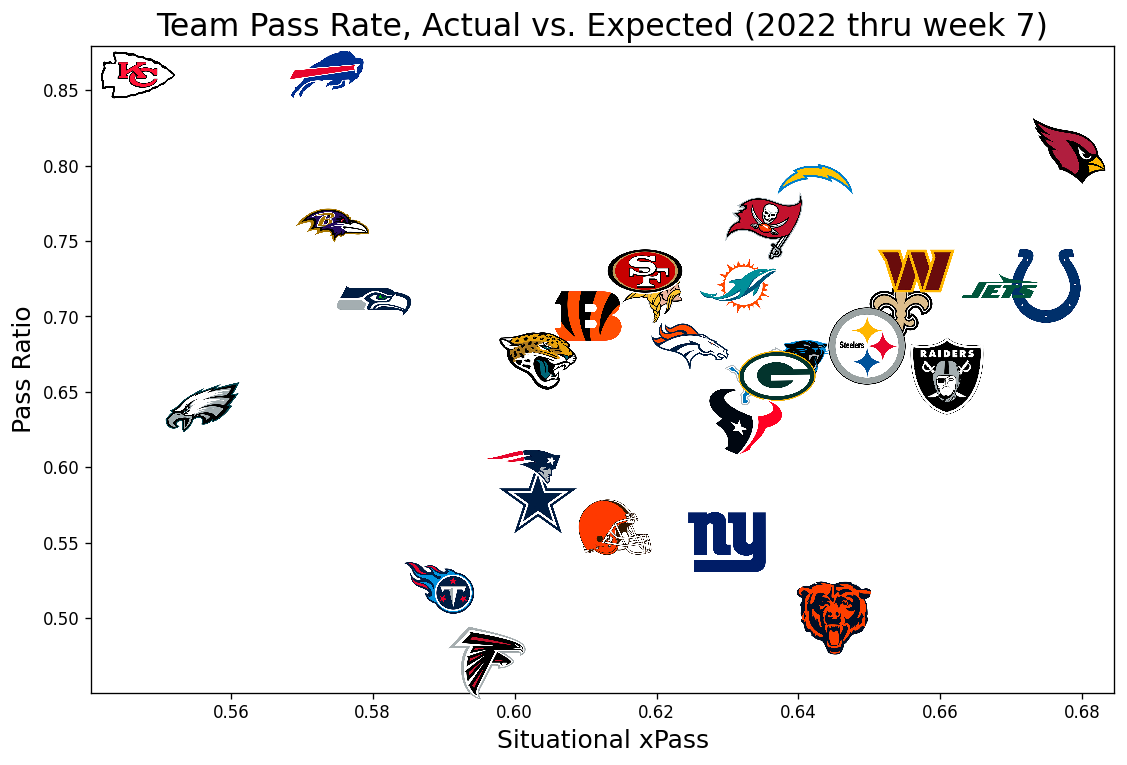

In [10]:
graph_feature_rate(2022,7,'Situational xPass',train_data,'Team Pass Rate, Actual vs. Expected (2022 thru week 7)')

### Compare OOS with Baldwin Model

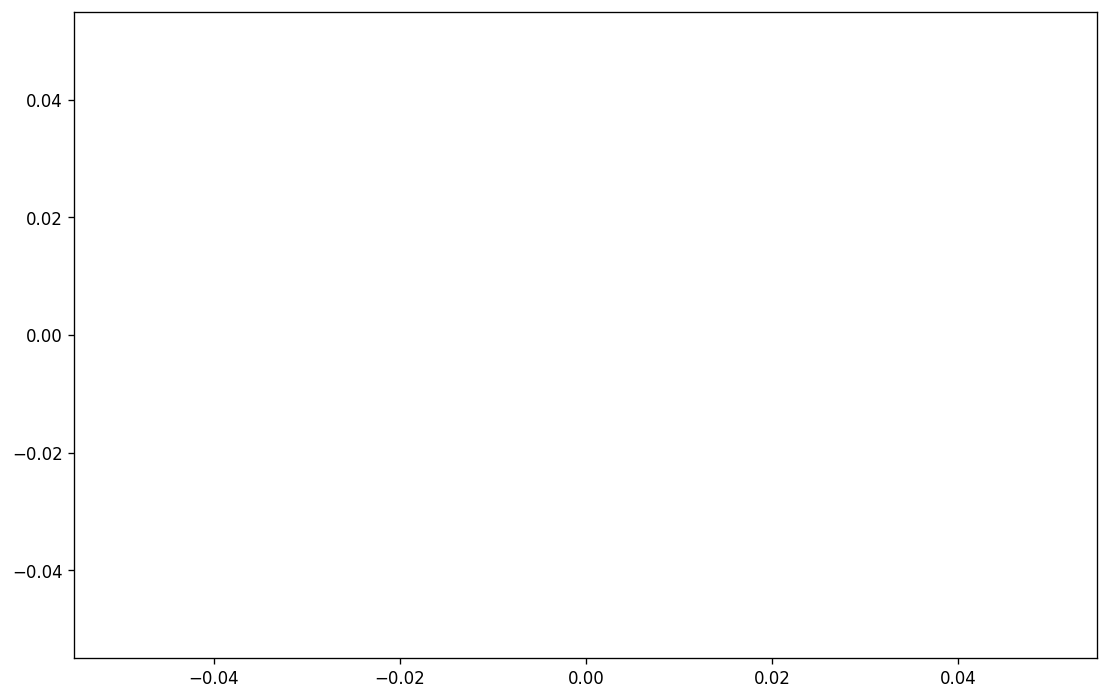

In [11]:
graph_feature_rate(2022,9,'Situational xPass',train_data,'Team Pass Rate, Actual vs. Expected (week 9)',9)

In [12]:
import pickle
bst = pickle.load(open('lgbm.sav', 'rb'))

In [13]:
final_features = ['Situational xPass','FAD',"# of RB's",'RMV','TICK','Run Formation Flag','DCI']

In [14]:
#test_data=pd.read_csv(os.path.join(root_dir, "data/test_data.csv"))

In [15]:
#test_data['xpass_bmi'] = test_data['off_xpass']-test_data['box_bmi']#-.4*test_data['qb_pass_rate_ewm']
#test_data['contextual_tempo'] = test_data['tempo'] +test_data['xpass_bmi']

In [16]:
#ff_pre=[ 'xpass_situational','a_mean','n_offense_backfield', #'a_max',#'QB_RB1_offset',#'receiverAlignment_3x2' #'QBdffy_RB', 'QBdff_T', 
     #   'motion-momentum','contextual_tempo', # 'xpass_bmi',#'qb_pass_rate_ewm','ipa','off_xpass',
     #   'neg_Formations', 'mean_pairwise_dist']

In [17]:
#from utility_db_25 import get_motion_cols, get_momentum_cols, create_momentum_index,motion_complexity_score

In [18]:
#motion_cols, rb_motion_cols=get_motion_cols(test_data.columns)
#momentum_cols, rb_cols=get_momentum_cols(test_data.columns)

#test_data=create_momentum_index(test_data, momentum_cols, rb_cols)
#test_data=motion_complexity_score(test_data, motion_cols, rb_motion_cols)

In [19]:
#df_15 = pd.read_csv('data/top_2_player_diff_last_10.csv')
#test_data = test_data.merge(df_15,how='left')

In [20]:
#rnd = dict(zip(ff_pre,final_features))
#test_data = test_data.rename(columns=rnd)

In [21]:
#test_data[final_features]

In [22]:
test_data = pd.read_csv('test_data_for_viz.csv')

In [23]:
test_data['pred'] = bst.predict_proba(test_data[final_features])[:,1]

In [24]:
test_data['pred']

0       0.689472
1       0.346425
2       0.648536
3       0.373859
4       0.507343
          ...   
1525    0.299637
1526    0.192251
1527    0.192251
1528    0.201810
1529    0.761594
Name: pred, Length: 1530, dtype: float64

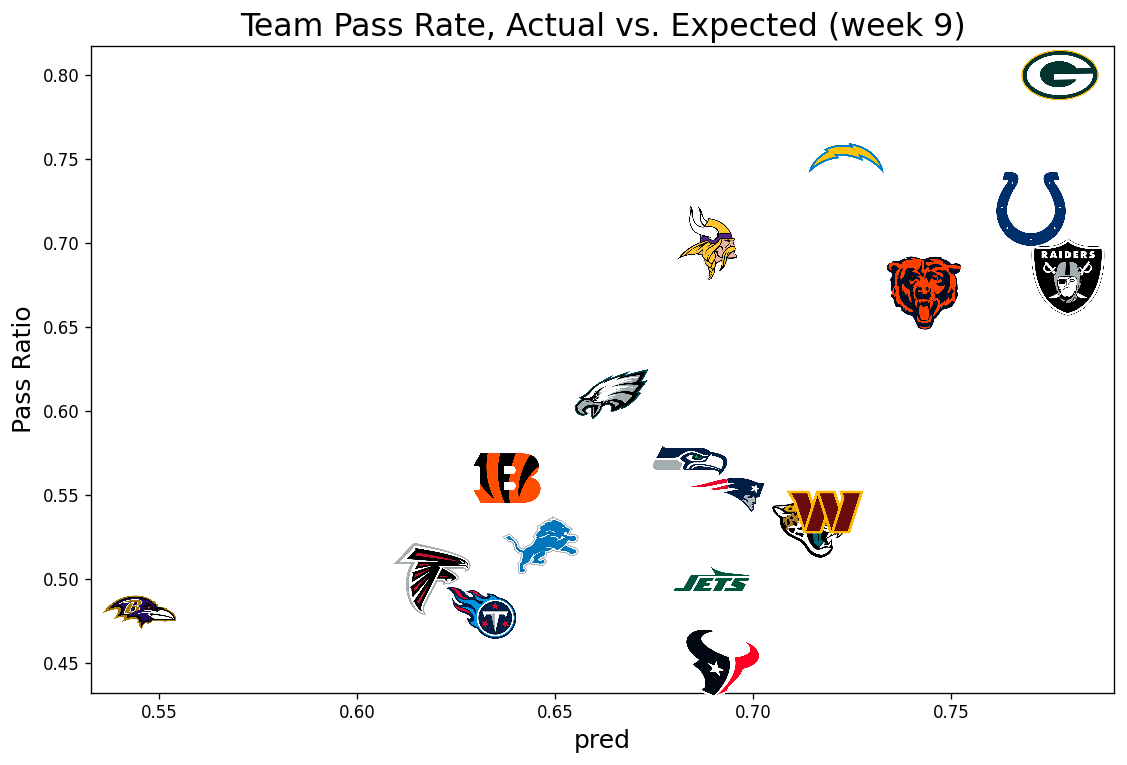

In [25]:
graph_feature_rate(2022,9,'pred',test_data,'Team Pass Rate, Actual vs. Expected (week 9)',8)

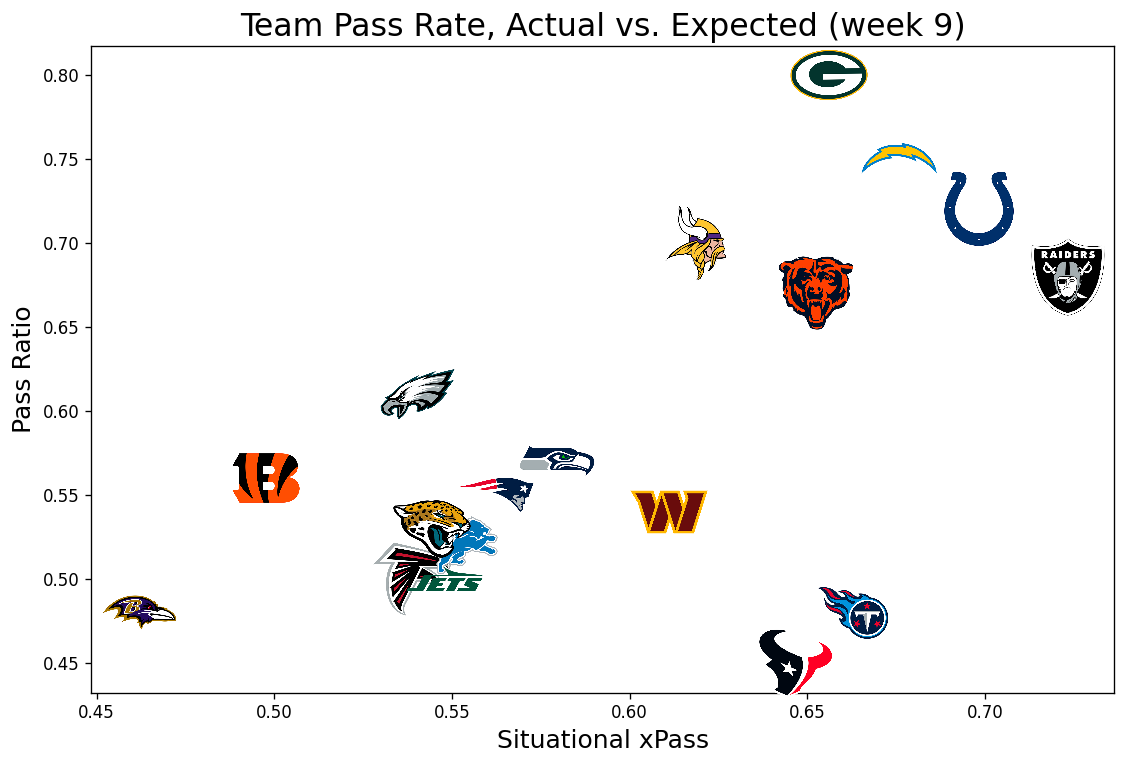

In [26]:
graph_feature_rate(2022,9,'Situational xPass',test_data,'Team Pass Rate, Actual vs. Expected (week 9)',8)